# Code Parameters 
* The discount factor, gamma has been set to 0.9
* The environment is slippery, ie., the transition kernel is stochastic

In [334]:
import matplotlib.pyplot as plt

In [335]:
env2=gym.make('D4x4-FrozenLake-v0')
print(env2.observation_space)
print(env2.action_space)


Discrete(16)
Discrete(4)


In [336]:
env1=gym.make('CartPole-v0')
print(env1.observation_space)
print(env1.action_space)

Box(4,)
Discrete(2)


In [337]:
import gym
env = gym.make('D4x4-FrozenLake-v0')
observation = env.reset()
for _ in range(1000):
    print(observation)
    env.render()
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action) # take a random action
    
    if done:
        print("I'm exiting after %s timesteps " % _)
        #break
    
env.close()

0

SFFF
FHFH
FFFH
HFFG
0
  (Up)
SFFF
FHFH
FFFH
HFFG
0
  (Left)
SFFF
FHFH
FFFH
HFFG
4
  (Down)
SFFF
FHFH
FFFH
HFFG
4
  (Down)
SFFF
FHFH
FFFH
HFFG
0
  (Up)
SFFF
FHFH
FFFH
HFFG
0
  (Up)
SFFF
FHFH
FFFH
HFFG
1
  (Up)
SFFF
FHFH
FFFH
HFFG
1
  (Left)
SFFF
FHFH
FFFH
HFFG
1
  (Up)
SFFF
FHFH
FFFH
HFFG
0
  (Left)
SFFF
FHFH
FFFH
HFFG
1
  (Down)
SFFF
FHFH
FFFH
HFFG
I'm exiting after 11 timesteps 
5
  (Left)
SFFF
FHFH
FFFH
HFFG
I'm exiting after 12 timesteps 
5
  (Up)
SFFF
FHFH
FFFH
HFFG
I'm exiting after 13 timesteps 
5
  (Up)
SFFF
FHFH
FFFH
HFFG
I'm exiting after 14 timesteps 
5
  (Up)
SFFF
FHFH
FFFH
HFFG
I'm exiting after 15 timesteps 
5
  (Down)
SFFF
FHFH
FFFH
HFFG
I'm exiting after 16 timesteps 
5
  (Down)
SFFF
FHFH
FFFH
HFFG
I'm exiting after 17 timesteps 
5
  (Up)
SFFF
FHFH
FFFH
HFFG
I'm exiting after 18 timesteps 
5
  (Right)
SFFF
FHFH
FFFH
HFFG
I'm exiting after 19 timesteps 
5
  (Up)
SFFF
FHFH
FFFH
HFFG
I'm exiting after 20 timesteps 
5
  (Up)
SFFF
FHFH
FFFH
HFFG
I'm exiting after 21 timest

# Actual Code Starts here

In [2]:
import numpy as np

In [3]:
import gym
from gym.envs.registration import register
register(
    id='D4x4-FrozenLake-v0',
    entry_point='gym.envs.toy_text.frozen_lake:FrozenLakeEnv',
    kwargs={'map_name': '4x4',
            'is_slippery': True})
env = gym.make('D4x4-FrozenLake-v0')
gamma=0.9

In [4]:

env.render()


SFFF
FHFH
FFFH
HFFG


# The Environment

* The environment consists of 16 states. (env.nS: count of state (int))
* The agent can take 4 actions (env.nA: count of action (int))
* The transition kernel P is a dictionary. 
* P[state][action] is tuples with (probability, nextstate, reward, terminal)
* For more information https://gym.openai.com/envs/FrozenLake-v0/

In [238]:
# Make sure env is declared 
def return_prob(y,x,a):
    if not env:
        return -2
    A = env.P[x][a]
    for i in range(len(A)):
        #print("A :",A[i][1])
        #print("y :",y)
        if y==A[i][1]:
            return A[i][0]
    # If y is not part of the Range, print 0
    return 0
def return_reward(y,x,a):
    if not env:
        return -2
    A = env.P[x][a]
    for i in range(len(A)):
        #print("A :",A[i][1])
        #print("y :",y)
        
        if y==A[i][1]:
            return A[i][2]
    
    # If y isn't part of the range
    return 0
        
        
    
    

In [239]:
print('Number of Actions', env.nA) 
print('Number of States ', env.nS)
print('P[5,0]', env.P[5][0])
print("-------------")
y=5
x=5
a=1
A = env.P[x][a]
print("x :", x, "a :", a, " A :", A)
#print(A[2][1])
#print(A[2][0])
print(return_reward(y,x,a))

Number of Actions 4
Number of States  16
P[5,0] [(1.0, 5, 0, True)]
-------------
x : 5 a : 1  A : [(1.0, 5, 0, True)]
0


# Generating a Heatmap 
* Pass the optimal value function and policy to the function fancy_visual to obtain a heat map.
* This function also prints the value function and policy. Hence you do not have to print it. 

In [252]:
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
import numpy as np
V_global=[]
def fancy_visual(value_func,policy_int):    
    grid = 4
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = seaborn.diverging_palette(220, 10, as_cmap=True)
    reshaped=np.reshape(value_func,(grid,grid))
    seaborn.heatmap(reshaped, cmap=cmap, vmax=1.1,
                square=True, xticklabels=grid+1, yticklabels=grid+1,
                linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True, fmt="f")
    counter=0
    for j in range(0, 4):
        for i in range(0, 4):
            if policy_int[counter]==1:
                plt.text(i+0.5, j+0.7, u'\u2193', fontsize=12)
            elif policy_int[counter]==3:
                plt.text(i+0.5, j+0.7, u'\u2191', fontsize=12)
            elif policy_int[counter]==0:
                plt.text(i+0.5, j+0.7, u'\u2190', fontsize=12)
            else:
                plt.text(i+0.5, j+0.7, u'\u2192', fontsize=12)
            counter=counter+1

    plt.title('Heatmap of policy iteration with value function values and directions')
    print('Value Function',value_func)
    print('Policy',policy_int)
    plt.show()



In [265]:
def norm_diff(V1,V2):
    A=np.sum(np.fabs(V1- V2))
    return A

def ValueIteration(env,gamma):
    global V_global
    ## HyperParameter
    delta=0.00001
    Plt_list=[] # For Plotting Convergence
    
    V=np.zeros(16)
    V_old=np.zeros(16)
    Policy =np.random.randint(0,3,16)
    #print("Initial Policy: ", Policy)
    #n_state, reward, terminal, _ = env.step(action)
    
    while True: #Make it true
        V_old=np.copy(V)
        # Crap MAX!!!!!  V_old = V creates an alias for it!!! Not a copy. Why in God's hell will that happen??
        #print("V1 is ",V_old)
        
        for x in range(env.nS):
            # a=Policy[x] #Action from that Policy - there is one action for every state
            #print("V is ",V)
            #print("in top of for loop")
            #print("V1 is ",V_old)
            #tsum =0.0
            tmax=0.0
            ta=0
            #print("State ", x)
            for a in range(env.nA):
                tsum=0.0
                for y in range(env.nS):
                    
#                     if return_reward(y,x,a):
#                         print("Old tsum ", tsum)
                    
                    tsum=tsum+return_prob(y,x,a)*(return_reward(y,x,a) + gamma*V_old[y])
#                     if tsum:
#                         print("y ", y)
#                         print("x ",x)
#                         print("a ", a)
#                         print("Prob ", return_prob(y,x,a))
#                         print("Reward ",return_reward(y,x,a))
#                         print("gamma ", gamma)
#                         print("V_old ", V_old[y])
#                         print("tsum", tsum)
#                         print("---------------")
                    # At this Point, I get that summation
                
                #print("Current Action: ", a)
                #print("Current Value Function: ", tsum)

                if a==0: # Initializing tmax and the corresponding action leading to the max Value Function
                    tmax=tsum
                    ta=a

                if tmax<tsum: # If there's an action with a better Value Function - Replace it with that
                    ta=a
                    tmax=tsum
#                 if tsum:
#                     print("Reinitialising tsum and a is ",a, " x is ", x)
                tsum=0.0
            #print("Action Decided: ", ta)
            # At this point I get the best Action Possible (ta)
            Policy[x]=ta
            #print("Before Assingment")
#             print("V is ",V)
#             print("in bottom of for loop")
#             print("V1 is ",V_old)
            
            V[x] = tmax # Assign the maximum Value to the Value Function
#             print("After Assingment")
#             print("V is ",V)
#             print("in bottom of for loop")
#             print("V1 is ",V_old)
#             print("-----------------------------------------\n\n")
            
#         print("out of for loop")
        
        Plt_list.append(norm_diff(V_old,V))
        #print(norm_diff(V_old,V))
        plt.plot(Plt_list, 'ro')
#         print("V1 is ", V_old)
        #print("V is", V)
    
    
        
        if norm_diff(V_old,V) < delta:
            print(Policy)
            fancy_visual(V,Policy)
            V_global=V
            return Policy
        
    # By now, I have old Value Function - V1 and new Value Function V
    
    
    
    # For Plotting
    
    


SFFF
FHFH
FFFH
HFFG
[1 3 0 0 0 0 0 0 3 1 0 0 0 2 1 0]
Value Function [0.06279689 0.05806242 0.07268536 0.0311503  0.08846729 0.
 0.11153923 0.         0.14363035 0.24667323 0.29911348 0.
 0.         0.37950242 0.638834   0.        ]
Policy [1 3 0 0 0 0 0 0 3 1 0 0 0 2 1 0]


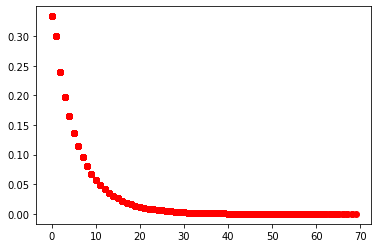

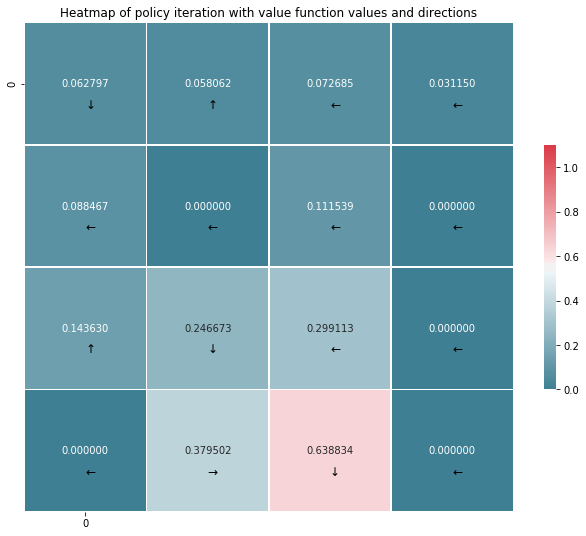

0
0
4
0
4
0
0
0
1
2
2
1
1
1
2
1


In [266]:
state = env.reset()
env.render()
VI_Policy=ValueIteration(env,gamma)
for i in VI_Policy:
    action=i
    observation, reward, done, info = env.step(action) # take a random action
    #env.render()
    print(observation)
    

    

In [271]:
print(V_global)

[0.06279689 0.05806242 0.07268536 0.0311503  0.08846729 0.
 0.11153923 0.         0.14363035 0.24667323 0.29911348 0.
 0.         0.37950242 0.638834   0.        ]


In [289]:
print("Optimal Q Function")
Q=np.zeros((env.nS,env.nA))


for x in range(env.nS):
    tmax=0.0
    ta=0
    for a in range(env.nA):
        tsum=0.0
        for y in range(env.nS):
            tsum=tsum+return_prob(y,x,a)*(return_reward(y,x,a) + gamma*V_global[y])
#             if a==0: # Initializing tmax and the corresponding action leading to the max Value Function
#                 tmax=tsum
#                 ta=a
#             if tmax<tsum: # If there's an action with a better Value Function - Replace it with that
#                 ta=a
#                 tmax=tsum
        Q[x][a] = tsum
        tsum=0.0
        #Policy[x]=ta
        
print("Optimal Q Function", Q)

Optimal Q Function
Optimal Q Function [[0.04537925 0.06279798 0.06279798 0.03625779]
 [0.03625779 0.04064467 0.03922433 0.0580634 ]
 [0.0726861  0.06022559 0.06461247 0.04856942]
 [0.0311507  0.0311507  0.00934509 0.0311507 ]
 [0.08846836 0.06962929 0.06192817 0.04537925]
 [0.         0.         0.         0.        ]
 [0.11153965 0.08973404 0.11153965 0.02180561]
 [0.         0.         0.         0.        ]
 [0.06962929 0.11709107 0.10054215 0.14363126]
 [0.15693983 0.24667387 0.20358477 0.13282315]
 [0.29911394 0.26565217 0.22511197 0.10746374]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.18785269 0.30550093 0.37950289 0.26565217]
 [0.39523497 0.63883426 0.61471758 0.5369181 ]
 [0.         0.         0.         0.        ]]


Value Function [0.00808376 0.9011669  0.93179113 0.07444652 0.30607864 0.19424786
 0.98709027 0.34946689 0.66070445 0.94904727 0.01066403 0.40150244
 0.65498077 0.39959331 0.10000709 0.71318773]
Policy [1 2 1 1 1 0 0 1 2 0 0 2 1 0 2 1]


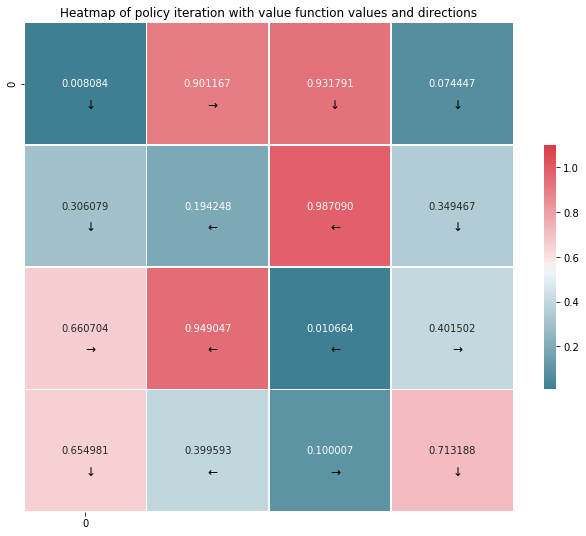

In [39]:
test_value=np.random.rand(16) #Random Value Function (only for plotting)
test_policy=np.random.randint(0,3,16) #Random Policy (only for plotting)
fancy_visual(test_value,test_policy)

# Policy Iteration

In [320]:
def PolicyIteration(env, gamma):
    
    V=np.zeros(16)
    V_old=np.copy(V)
    pi=np.random.randint(0,env.nA,env.nS)
    

In [321]:
#Initialisation


In [329]:
def UpdatePolicy(V_old, P_old):
    Policy=np.zeros(env.nS)
    for x in range(env.nS):
        tmax=0.0
        ta=0
        for a in range(env.nA):
            tsum=0.0
            for y in range(env.nS):
                tsum=tsum+return_prob(y,x,a)*(return_reward(y,x,a) + gamma*V_old[y])
            if a==0: # Initializing tmax and the corresponding action leading to the max Value Function
                tmax=tsum
                ta=a

            if tmax<tsum: # If there's an action with a better Value Function - Replace it with that
                ta=a
                tmax=tsum
            tsum=0.0
        Policy[x]=ta
    
    if np.array_equal(P_old,Policy):
        boo=True
    else:
        boo=False
    return boo, Policy
            #V[x] = tmax # Assign the maximum Value to the Value Function       

In [330]:
#Beginning of While Loop
def PolicyIteration(env, gamma):
    V=np.zeros(16)
    V_old=np.copy(V)
    ## HyperParameter
    delta=0.00001
    Plt_list=[] # For Plotting Convergence
    PIPolicy=np.random.randint(0,env.nA,env.nS)
    print(PIPolicy)
    tsum=0
    while True:
        for x in range(env.nS):
            a=PIPolicy[x]
            for y in range(env.nS):
                tsum=tsum+return_prob(y,x,a)*(return_reward(y,x,a) + gamma*V_old[y])
            V[x] = tsum
            tsum=0.0
        #print(V)
        boo = False
        if norm_diff(V_old,V) < delta:
            print(V)
            V_old=V
            boo, PIPolicy=UpdatePolicy(V, PIPolicy)
            Plt_list.append(norm_diff(V_old,V))
        else:
            V_old=V
        if boo:
            return PIPolicy, V
        

[2 0 3 1 2 2 3 2 1 0 2 3 1 1 2 1]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.1        0.
 0.         0.1        0.46333333 0.        ]
[0.         0.         0.         0.         0.         0.
 0.03       0.         0.         0.06       0.166      0.
 0.         0.169      0.52303333 0.        ]
[0.         0.         0.009      0.0027     0.         0.
 0.0525     0.         0.018      0.1059     0.20443    0.
 0.         0.23938    0.56205733 0.        ]
[0.         0.0027     0.01926    0.006588   0.0054     0.
 0.067107   0.         0.03717    0.144294   0.2320375  0.
 0.         0.2837194  0.58706635 0.        ]
[0.00243    0.006588   0.0278865  0.01034235 0.0135     0.
 0.0779772  0.         0.0584892  0.17227383 0.25119521 0.
 0.         0.31291787 0.6033286  0.        ]
[0.0067554  0.01236897 0.03486181 0.01356125 0.02362338 0.
 0.08581711 0.         0.07631592 0.1921287  0.26438232 0.
 0.         0.33251255 0.614

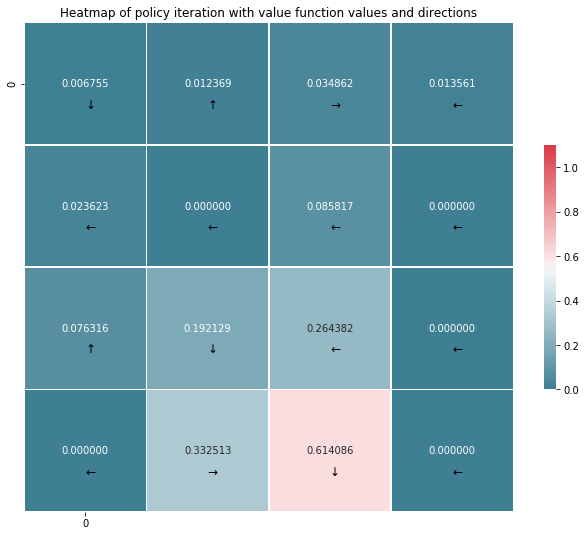

In [333]:
A,B=PolicyIteration(env,gamma)
fancy_visual(B,A)

# Q Learning 
* Q learning is a model free approach, thus you will not use the transition kernel. 
* You can reset the environment using env.reset()
* env.step(action) takes in action as an argument and gives next state,reward,terminal and info as the output 

In [4]:
state=env.reset() #Reset the env
max_step=20 
for step in range(max_step):    
    action=env.action_space.sample() #Random Action
    n_state,reward,terminal,_=env.step(action) #Take a step 
    print('State:',state,'Action:',action,'Reward:',reward,'Next State:',n_state,'Terminal:',terminal)
    state=n_state 
    if terminal:
        break
    
    

State: 0 Action: 0 Reward: 0.0 Next State: 4 Terminal: False
State: 4 Action: 3 Reward: 0.0 Next State: 0 Terminal: False
State: 0 Action: 1 Reward: 0.0 Next State: 1 Terminal: False
State: 1 Action: 0 Reward: 0.0 Next State: 5 Terminal: True
